## Deelvraag 3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata

In [2]:
#import csv van 15 slechtse landen
CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str) 
CPIA_worst15   

,Unnamed: 0,country,date,decimal,indicator,value,country_code
0,15138,"Yemen, Rep.",2017,1,CPIA gender equality rating (1=low to 6=high),1.5,YE
1,12934,Somalia,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SO
2,7482,Guinea-Bissau,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,GW
3,13050,South Sudan,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SS
4,9860,Mali,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,ML
5,6264,Eritrea,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,ER
6,11078,Niger,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,NE
7,8642,Kiribati,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,KI
8,5278,"Congo, Dem. Rep.",2017,1,CPIA gender equality rating (1=low to 6=high),2.5,CD
9,4930,Chad,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,TD


In [3]:
#importeren van GDP data

GDP_all = pd.DataFrame(wbdata.get_data("NY.GDP.PCAP.PP.CD"))
GDP_all['country'] = GDP_all.country.astype(str).str.slice(23,-2)
GDP_all['indicator'] = GDP_all.indicator.astype(str).str.slice(35,-2)
GDP_all['value'] = GDP_all.value.astype(float).round(1)
GDP_all["date"] = GDP_all.date.astype(str)
GDP_all.loc[(GDP_all["value"] >= 0)]
GDP_all.head()

# Van geen enkel jaartal is de GDP van Somalia bekend. 
#GDP_all.loc[(GDP_all["country"] == "Somalia") & (GDP_all['value'] > 0)]

,country,date,decimal,indicator,value
0,Arab World,2017,1,": 'GDP per capita, PPP (current international $)",16922.1
1,Arab World,2016,1,": 'GDP per capita, PPP (current international $)",16716.5
2,Arab World,2015,1,": 'GDP per capita, PPP (current international $)",16338.0
3,Arab World,2014,1,": 'GDP per capita, PPP (current international $)",16011.3
4,Arab World,2013,1,": 'GDP per capita, PPP (current international $)",15703.2


In [6]:
# Dataframe met de meest recente waarde van GDP van elk land.

GDP_now = GDP_all.sort_values("date", ascending = False).drop_duplicates(["country"])

# nieuw dataframe met de GDP van de 15 landen met de laagste equality rating 

GDP_worst15 = pd.merge( CPIA_worst15, GDP_now, how = "left", left_on = ["country", "date"], right_on = ["country", "date"])
GDP_worst15

# missing data!

,Unnamed: 0,country,date,decimal_x,indicator_x,value_x,country_code,decimal_y,indicator_y,value_y
0,15138,"Yemen, Rep.",2017,1,CPIA gender equality rating (1=low to 6=high),1.5,YE,1,": 'GDP per capita, PPP (current international $)",NaN
1,12934,Somalia,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SO,1,": 'GDP per capita, PPP (current international $)",NaN
2,7482,Guinea-Bissau,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,GW,1,": 'GDP per capita, PPP (current international $)",1700.2
3,13050,South Sudan,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SS,1,": 'GDP per capita, PPP (current international $)",NaN
4,9860,Mali,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,ML,1,": 'GDP per capita, PPP (current international $)",2211.4
5,6264,Eritrea,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,ER,1,": 'GDP per capita, PPP (current international $)",NaN
6,11078,Niger,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,NE,1,": 'GDP per capita, PPP (current international $)",1016.6
7,8642,Kiribati,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,KI,1,": 'GDP per capita, PPP (current international $)",2175.0
8,5278,"Congo, Dem. Rep.",2017,1,CPIA gender equality rating (1=low to 6=high),2.5,CD,1,": 'GDP per capita, PPP (current international $)",887.2
9,4930,Chad,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,TD,1,": 'GDP per capita, PPP (current international $)",1941.2


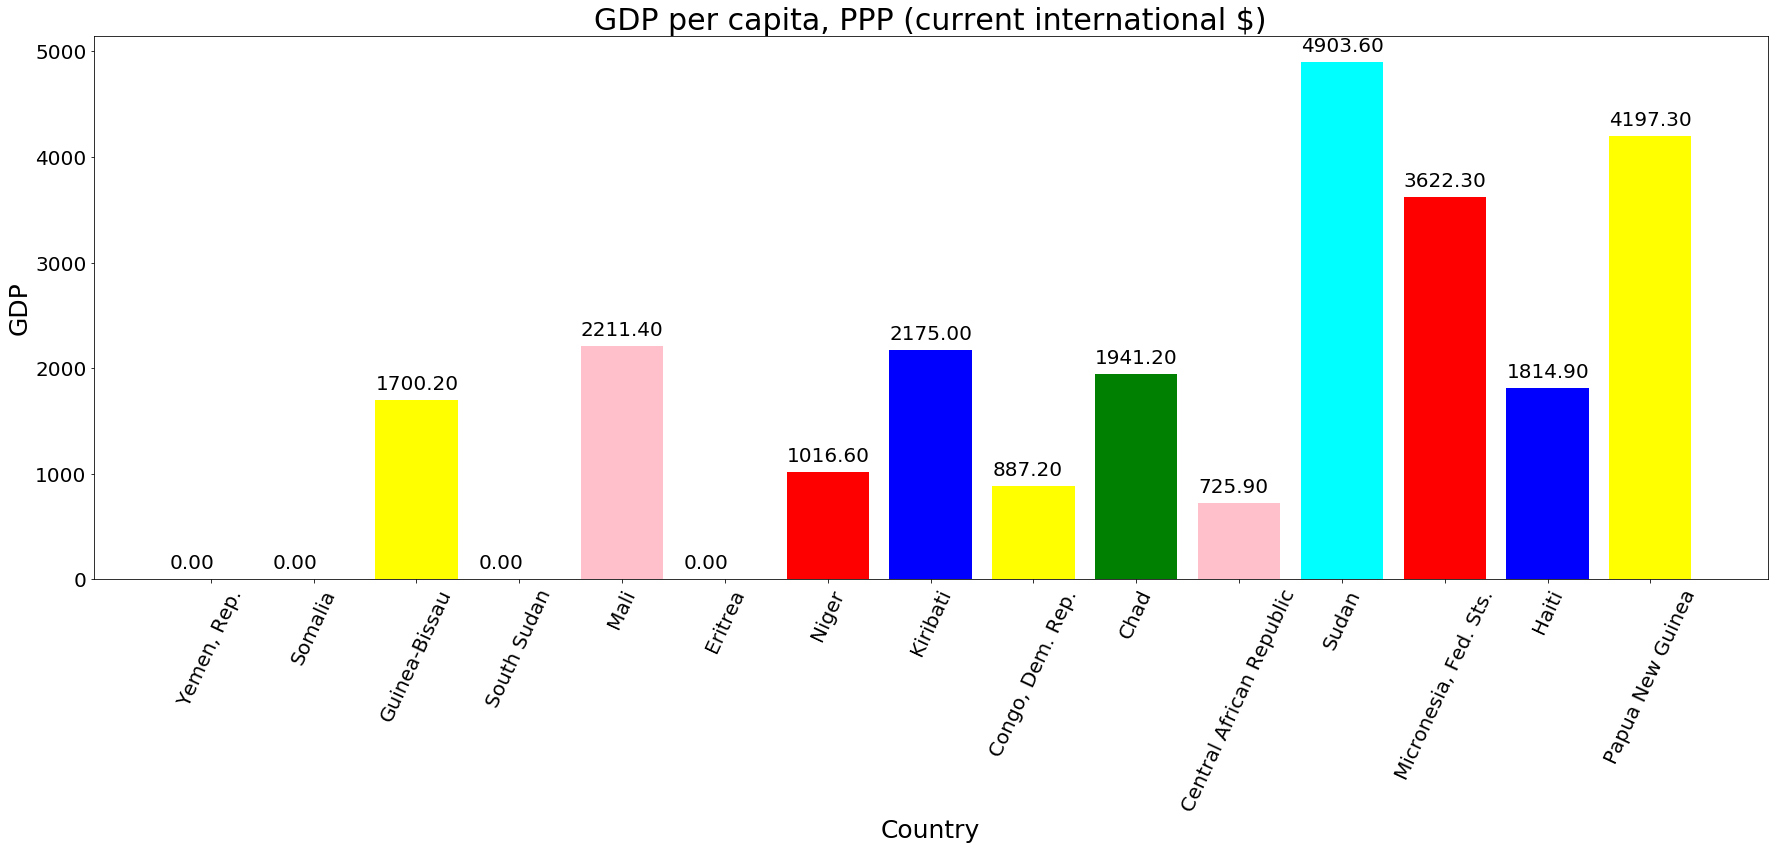

In [7]:
# plot van de GDP van de landen waar equality rating het laagste is

# array maken van de twee kolommen die nuttig zijn 
country_worst15 = GDP_worst15.country.values
value_worst15 = GDP_worst15.value_y.values

colors = ["Red", "Blue", "Yellow", "Green", "Pink", "Cyan"]

value_worst15[np.isnan(value_worst15)] = 0

plt.figure(figsize=(30, 10))
plt.bar(country_worst15, value_worst15, color = colors, width = 0.8, align='center')

plt.xticks(np.arange( len(country_worst15) ), country_worst15, rotation = 65, fontsize = 20)
plt.yticks(fontsize = 20)

plt.title("GDP per capita, PPP (current international $)", fontsize = 30)
plt.xlabel("Country", fontsize = 25)
plt.ylabel("GDP", fontsize = 25)

# De waarde van het land bovenop bar
for (i, value) in enumerate (value_worst15):
    plt.text(i- 0.4 , value + 100 , "%.2f" % (value) , fontsize = 20)

In [8]:
# Dataframe met data over de jaren heen van de 15 landen

GDP_years = GDP_all.loc[((GDP_all["country"].isin(CPIA_worst15["country"]))),:]
#GDP15_years = GDP_years.sort_values(by = "date", ascending = True)
GDP_years

,country,date,decimal,indicator,value
4872,Central African Republic,2017,1,": 'GDP per capita, PPP (current international $)",725.9
4873,Central African Republic,2016,1,": 'GDP per capita, PPP (current international $)",693.3
4874,Central African Republic,2015,1,": 'GDP per capita, PPP (current international $)",661.9
4875,Central African Republic,2014,1,": 'GDP per capita, PPP (current international $)",629.0
4876,Central African Republic,2013,1,": 'GDP per capita, PPP (current international $)",613.7
4877,Central African Republic,2012,1,": 'GDP per capita, PPP (current international $)",956.1
4878,Central African Republic,2011,1,": 'GDP per capita, PPP (current international $)",904.6
4879,Central African Republic,2010,1,": 'GDP per capita, PPP (current international $)",863.3
4880,Central African Republic,2009,1,": 'GDP per capita, PPP (current international $)",836.0
4881,Central African Republic,2008,1,": 'GDP per capita, PPP (current international $)",826.8


Text(0.5,1,'Change in GDP per capita (current international $)')

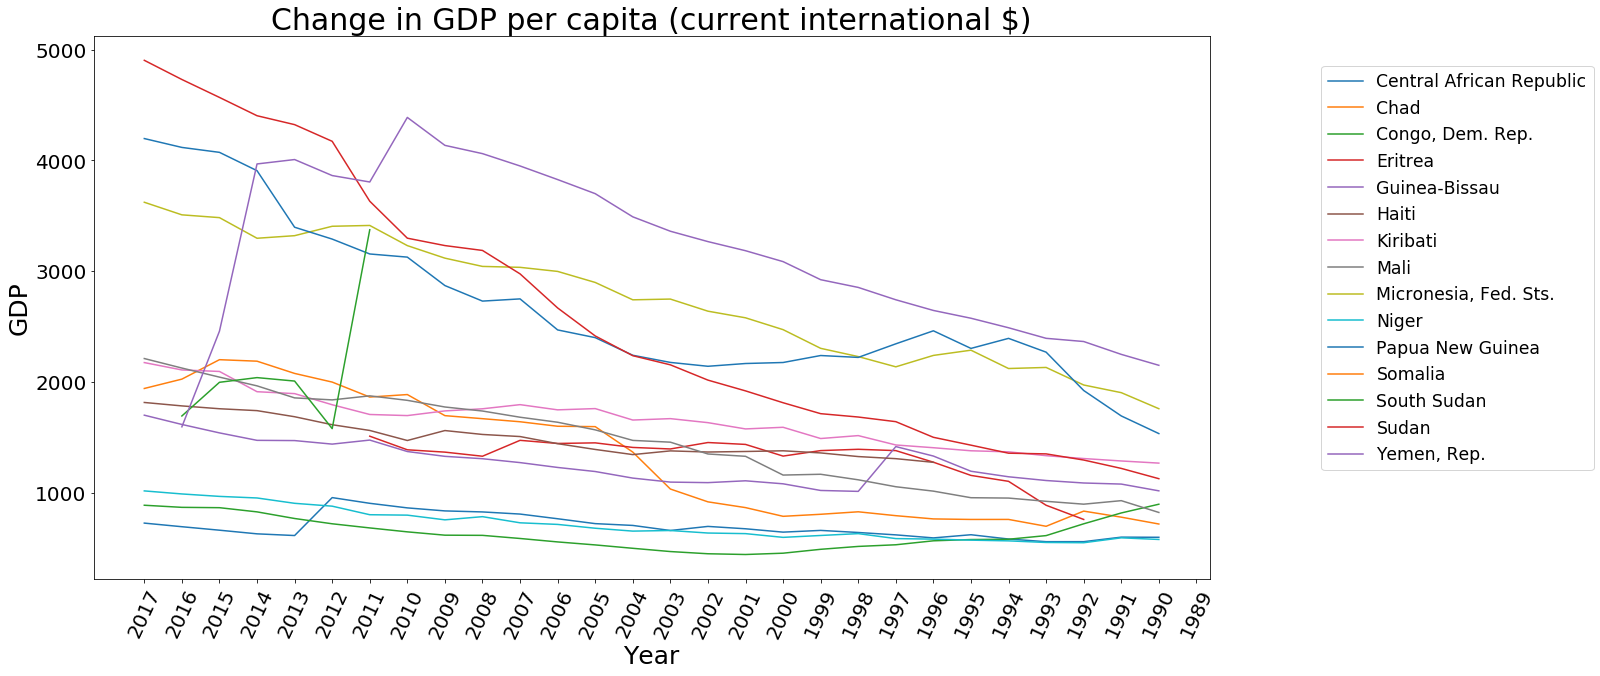

In [11]:
# visualiseren van verandering per land

fig,ax = plt.subplots(figsize=(20, 10))

for name in GDP_years["country"].unique():
    ax.plot(GDP_years[GDP_years.country==name].date,GDP_years[GDP_years.country==name].value,label=name)

#change size of legend
ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

plt.xlabel("Year", fontsize = 25)
plt.ylabel("GDP", fontsize = 25)
plt.xticks(rotation = 65, fontsize = 20)
plt.yticks(fontsize = 20)

plt.title("Change in GDP per capita (current international $)", fontsize = 30)

# tekst bij de lijnen. 


### Extrapoleren

In [12]:
#extrapoleren

#bonus assignment week 5

# the degree of the fitting polynomial
ndeg = 4
ndate = len(date_years)

# Use polyfit to find a fitting polynomial, i.e. with degree 3 or 4 (for my random data)
# Poly will contain the coefficients of the found polynomial
poly = np.polyfit( np.arange(ndate), value_years, ndeg)

# x-values and y-values of the polyfit. The prediction looks one assignment further.
# Use polyval to use the found coefficients in the polynomial
x_pred = np.arange(ndate + 200)
y_pred = np.polyval(poly, x_pred)

# Plot both the orginal and the fitting function, including prediction
plt.plot( np.arange(ndate) , value_years, color='Blue', label='??')
#plt.plot( x_pred, y_pred, color='Green', label='!!')

# plt.title('Average grades per assignment')
# plt.xlabel('Assignment')
# plt.ylabel('Grade')

# Put a legend
#plt.legend( loc=(1.02, 0.7) )

# print("The predicted GDP of the next year is %.2f" % y_pred[ndate])

# x_pred

NameError: name 'date_years' is not defined